In [1]:
from transformers import BertForQuestionAnswering, BertTokenizer
import torch

In [2]:
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"
model = BertForQuestionAnswering.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)  # ✅ Correct

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Embeddings

In [3]:
question = "When was the first dvd released?"
answer_document = "The first DVD (Digital Versatile Disc) was released on March 24, 1997. It was a movie titled 'Twister' and was released in Japan. DVDs quickly gained popularity as a replacement for VHS tapes and became a common format for storing and distributing digital video and data."

In [4]:
encoding = tokenizer.encode_plus(text=question, text_pair=answer_document)
print(encoding)

{'input_ids': [101, 2043, 2001, 1996, 2034, 4966, 2207, 1029, 102, 1996, 2034, 4966, 1006, 3617, 22979, 5860, 1007, 2001, 2207, 2006, 2233, 2484, 1010, 2722, 1012, 2009, 2001, 1037, 3185, 4159, 1005, 9792, 2121, 1005, 1998, 2001, 2207, 1999, 2900, 1012, 22477, 2855, 4227, 6217, 2004, 1037, 6110, 2005, 17550, 13324, 1998, 2150, 1037, 2691, 4289, 2005, 23977, 1998, 20083, 3617, 2678, 1998, 2951, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [5]:
inputs = encoding['input_ids']
sentence_embedding = encoding['token_type_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [6]:
tokenizer.decode(101)
tokenizer.decode(102)

'[SEP]'

In [8]:
output = model(input_ids = torch.tensor([inputs]), token_type_ids = torch.tensor([sentence_embedding]))

## Model Output

In [9]:
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)
print(start_index)
print(end_index)

tensor(20)
tensor(23)


In [10]:
answer = ' '.join(tokens[start_index:end_index+1])
print(answer)

march 24 , 1997


In [11]:
import matplotlib as plt
import seaborn as sns


In [16]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()


In [17]:
token_labels = []
for i, token in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

/var/folders/4l/9mc2zy156xd5pvb9k7q9x0m80000gn/T/ipykernel_95374/2304490478.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


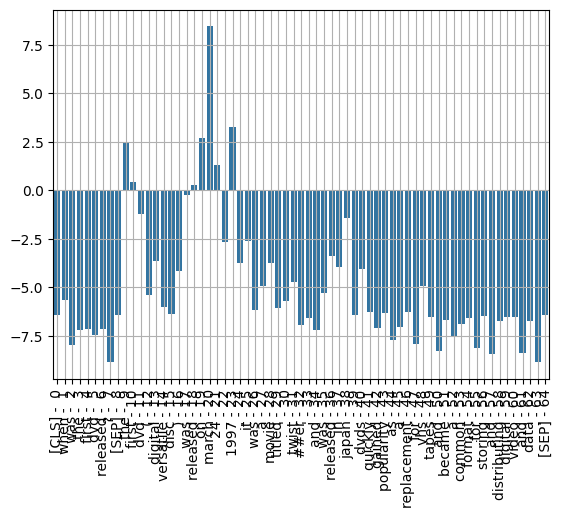

In [18]:
ax = sns.barplot(x = token_labels, y = s_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)